In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
# 更多輸入

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# 載入影像
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# (28x28)乃 2D!
# convolution 需要 height x width x color 我們得 expand_dims
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# 共有多少種物品
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# 編譯與訓練
# 請確認用GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5251 - accuracy: 0.8052 - val_loss: 0.4136 - val_accuracy: 0.8473
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3666 - accuracy: 0.8648 - val_loss: 0.3418 - val_accuracy: 0.8713
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3136 - accuracy: 0.8811 - val_loss: 0.3149 - val_accuracy: 0.8800
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2795 - accuracy: 0.8946 - val_loss: 0.3028 - val_accuracy: 0.8879
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2532 - accuracy: 0.9050 - val_loss: 0.2980 - val_accuracy: 0.8924
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2316 - accuracy: 0.9129 - val_loss: 0.2903 - val_accuracy: 0.8940
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2135 - accuracy: 0.9190 - val_loss: 0.2979 - val_accuracy

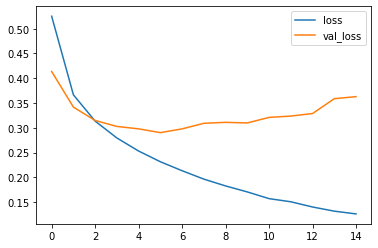

In [ ]:
# 繪出迭代損失
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

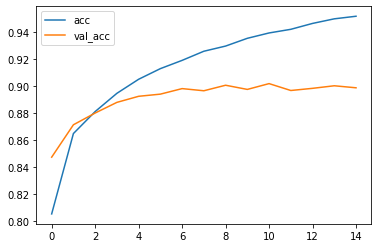

In [ ]:
# 繪出迭代精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[841   0  19  23   7   1 101   0   8   0]
 [  4 968   2  19   2   0   3   0   2   0]
 [ 14   0 812  11  68   0  91   0   4   0]
 [ 15   2  17 922  17   0  24   0   3   0]
 [  0   0  44  34 845   0  74   0   3   0]
 [  1   0   0   0   1 972   0  13   5   8]
 [ 75   0  59  25  92   1 736   0  12   0]
 [  0   0   0   0   0  16   0 970   0  14]
 [  1   1   3   4   7   1   7   2 974   0]
 [  1   0   0   0   0   7   0  44   1 947]]


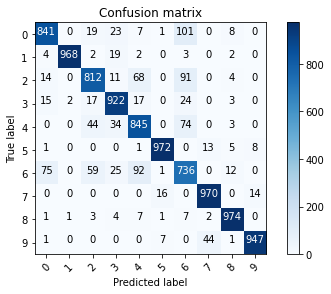

In [ ]:
# 繪出混淆矩陣
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# 映射標籤
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

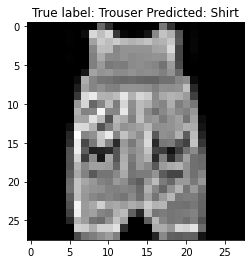

In [ ]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));